# [やる夫で学ぶデジタル信号処理](http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/main.html)

![](https://cdn-ak.f.st-hatena.com/images/fotolife/s/sugatareiji/20160929/20160929003216.gif)

# 目標

フーリエ変換群を実装して、周波数分析の基本をおさらいしよう

numpyとmatplotlib.pyplotをそれぞれnp,pltとしてインポートする

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1.フーリエ級数展開

![](http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/img62.png)

![](http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/img63.png)

メモ

$\sum_{k=1}^∞ (a_k cos(\frac{2\pi k}{T_0}t) + b_k sin(\frac{2\pi k}{T_0}t))$

使うデータを用意する。今回は周波数の異なるsin波とcos波の和とする

$f(t) = a_0 + a_{sin} sin(2\pi f_{sin}t) + a_{cos} cos(2\pi f_{cos}t)$

In [54]:
def data1(t, a0=1, a_sin=2, f_sin=2, a_cos=3, f_cos=3):
    '''
    引数説明
    t : 秒単位の時間
    a : 振幅
    f : 周波数
    返値説明
    float : data1のt秒での値
    '''
    return a0 + a_sin*np.sin(2*np.pi*f_sin*t) + a_cos*np.cos(2*np.pi*f_cos*t)
f = lambda t:data1(t)

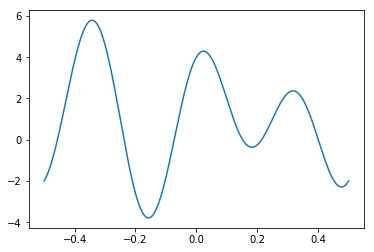

In [55]:
T0 = 1
T = np.arange(-T0/2, T0/2, 0.0001)
plt.plot(T, f(T))
plt.show()

以下の定積分を求めて直流成分を出す

![1.7](http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/img87.png)

と、そのまえに区分求積法で定積分を求める関数を定義

In [78]:
def integral(f, start_t, end_t, dt=0.0001):
    '''
    引数説明
    f:定積分したい関数。nump.arrayを食える必要がある
    start_t:開始時間
    end_t:終了時間
    dt:微小時間。短いほど良い結果が得やすいが、計算量が増える
    返値説明
    float : 定積分値
    '''
    T = np.arange(start_t, end_t, dt)
    return f(T).sum()*dt

### 課題

$a_0$を求めてみよう

In [79]:
integral(f, -T0/2, T0/2)/T0

1.0000000000003308

次に、以下の式を使って、それぞれの周波数のを求める

$\displaystyle a_0 = \frac{1}{T_0}\int_{-T_0/2}^{T_0/2}f(t)dt$

$\displaystyle a_k = \frac{2}{T_0} \int_{-T_0/2}^{T_0/2}f(t) \cos{\left(\frac{2\pi k}{T_0}t\right)}dt    (k = 1, 2, 3, \cdots)$

$\displaystyle b_k = \frac{2}{T_0} \int_{-T_0/2}^{T_0/2}f(t) \sin{\left(\frac{2\pi k}{T_0}t\right)}dt    (k = 1, 2, 3, \cdots)$

### 課題

$a_k$,$b_k$を求めてみよう

In [87]:
T0 = 1
for freq in range(1, 5):
    a_sin = integral(lambda t:f(t)*np.sin(2*np.pi*freq*t), -T0/2, T0/2)*2/T0    
    a_cos = integral(lambda t:f(t)*np.cos(2*np.pi*freq*t), -T0/2, T0/2)*2/T0    
    print('freq={}Hz, a_sin={:.2f}, a_cos={:.2f}'.format(freq, a_sin, a_cos))

freq=1Hz, a_sin=0.00, a_cos=-0.00
freq=2Hz, a_sin=2.00, a_cos=0.00
freq=3Hz, a_sin=0.00, a_cos=3.00
freq=4Hz, a_sin=-0.00, a_cos=0.00


# 2.複素指数関数型のフーリエ級数

![2.7](http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/img131.png)

<P>
</DD>
<DT><STRONG>やらない夫</STRONG></DT>
<DD>各周波数成分が振幅と位相を持つ，という意味ではこの方がわかりやすいのは確かかもしれないな．でも，その sin 関数の中に$\theta_k$が入ったままの表現だと，数学的にちょっと扱いにくいんだな．だからあまり使われない．

オイラーの公式より

![](http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/img133.png)

と表せて、これを使うと$f(t)$が簡単にできて、周波数kの振幅と位相を表す複素数$F_k$を用いれば

![](http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/img153.png)

と表せる。ただし、基本角振動数$\Omega_0 = \frac{2\pi}{T_0}$である

ここで、$F_k$を求める式は以下のように与えられる

![](http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/img178.png)

または

![](http://www.ic.is.tohoku.ac.jp/~swk/lecture/yaruodsp/img179.png)

### 課題

複素数を使ったフーリエ級数展開を実装をして、$F_k$を-5～4Hzの間で求めよ

- 負の周波数も定義できることに注意しよう
- cmathモジュールを使って作ると簡単に実装できる

freq=-5Hz, F_abs=0.00, F_phi=3.14[rad]
freq=-4Hz, F_abs=0.00, F_phi=-0.00[rad]
freq=-3Hz, F_abs=1.50, F_phi=0.00[rad]
freq=-2Hz, F_abs=1.00, F_phi=1.57[rad]
freq=-1Hz, F_abs=0.00, F_phi=3.14[rad]
freq=0Hz, F_abs=1.00, F_phi=0.00[rad]
freq=1Hz, F_abs=0.00, F_phi=-3.14[rad]
freq=2Hz, F_abs=1.00, F_phi=-1.57[rad]
freq=3Hz, F_abs=1.50, F_phi=-0.00[rad]
freq=4Hz, F_abs=0.00, F_phi=0.00[rad]


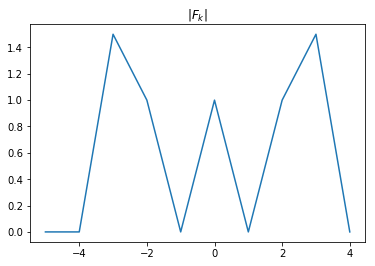

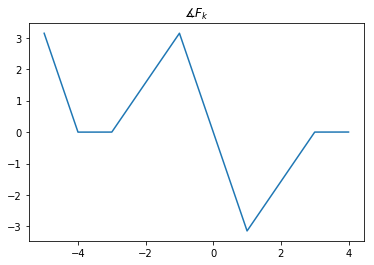

In [94]:
import cmath
T0 = 1
F_k_abs_list = []
F_k_phi_list = []
for freq in range(-5, 5):
    F_k = integral(lambda t:f(t)*np.exp(complex(0, -2*np.pi*freq)*t), -T0/2, T0/2)*1/T0    
    F_k_abs_list.append(cmath.polar(F_k)[0])
    F_k_phi_list.append(cmath.polar(F_k)[1])
    print('freq={}Hz, F_abs={:.2f}, F_phi={:.2f}[rad]'.format(freq, cmath.polar(F_k)[0], cmath.polar(F_k)[1]))

plt.plot(np.arange(-5,5), F_k_abs_list)
plt.title('$|F_k|$')
plt.show()
plt.plot(np.arange(-5,5), F_k_phi_list)
plt.title('$∡F_k$')
plt.show()

### 注意

**負の周波数**に対して、正の周波数は絶対値では同じ値を持ち、偏角では正負が逆の値を持つ

# 3.フーリエ変換

### フーリエ変換

$\displaystyle F(\Omega) = \int_{-\infty}^{\infty} f(t) e^{-j\Omega t}dt$

### 逆フーリエ変換

$\displaystyle f(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} F(\Omega) e^{j\Omega t} d\Omega$

これは実装できないので飛ばす

# 4と5も飛ばす

# 6.離散フーリエ変換

離散時間フーリエ変換/逆変換の公式

$\displaystyle F(\omega) = \sum_{n = -\infty}^{\infty} f[n] e^{-j\omega n}$

$\displaystyle f[n] = \frac{1}{2\pi}\int_{-\pi}^{\pi} F(\omega) e^{j\omega n} d\omega$

これを周波数に対しても離散化したい。つまり、時間領域では周期的な信号を扱いたい

### 離散フーリエ変換

$\displaystyle F[k] = \sum_{n = 0}^{N-1} f[n] e^{-j \frac{2\pi}{N}kn}     (k = 0, 1, \cdots, N-1)$

### 離散フーリエ逆変換

$\displaystyle f[n] = \frac{1}{N} \sum_{k = 0}^{N-1} F[k] e^{j\frac{2\pi}{N} kn}     (n = 0, 1, \cdots, N-1)$

### 課題

離散フーリエ変換、逆変換を実装して、「信号を周波数に分解できていること」、「もとの信号に戻せていること」の二つを確認する

まずはサンプリングするとよい。このときサンプリング周波数は$f_s$10Hzと100Hzの2つで試すこと

実際には3Hzほどの信号を見分けるだけならサンプリング定理より$f_s = 6Hz$でも十分である。ただし、見栄えが悪くなる

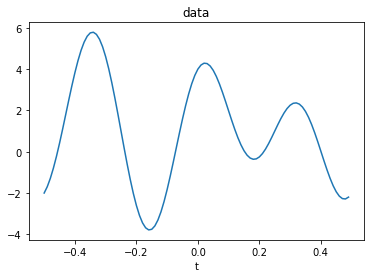

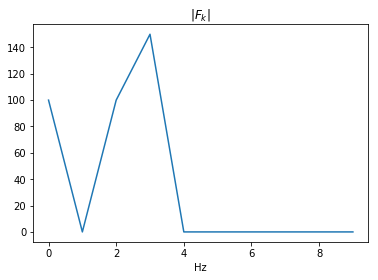

In [132]:
import cmath
f = lambda t:data1(t)
T0 = 1
fs = 100
sample_time = np.arange(-T0/2, T0/2, 1/fs)
N = len(sample_time)
data = f(sample_time)
plt.plot(sample_time, data)
plt.title('data')
plt.xlabel('t')
plt.show()
F = []
for k in range(0, N):
    s = 0
    for n in range(0, N):
        s += data[n]*np.exp(complex(0, -2*np.pi)*k*n/N)
    F.append(s)
    if N <= 10:
        print('k={}, F_abs={:.2f}, F_phi={:.2f}[rad]'.format(k, cmath.polar(s)[0], cmath.polar(s)[1]))
F = np.array(F)
if N > 10:
    plt.plot(fs/N*np.arange(0,10), abs(F)[:10])
else:
    plt.plot(fs/N*np.arange(0,N), abs(F)[:N])
plt.title('$|F_k|$')
plt.xlabel('Hz')
plt.show()

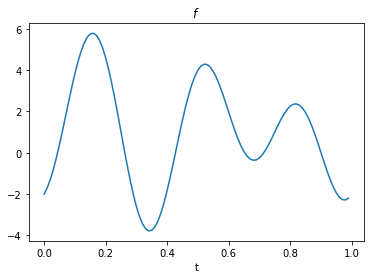

In [133]:
f = []
for n in range(0, N):
    s = 0
    for k in range(0, N):
        s += F[k]*np.exp(complex(0, 2*np.pi)*k*n/N)/N
    f.append(s)
    if N <= 10:
        print('k={}, F_abs={:.2f}, F_phi={:.2f}[rad]'.format(k, cmath.polar(s)[0], cmath.polar(s)[1]))
f = np.array(f)
plt.plot(T0/N*np.arange(0,N), f.real[:N])
plt.title('$f$')
plt.xlabel('t')
plt.show()